# Curtosis

Lucho Nov|2023

La **curtosis** es una medida estadística que describe la forma de la distribución de datos, específicamente cómo se distribuyen los valores en relación con la "normalidad" o una distribución de Gauss (distribución normal).

Hay tres tipos principales de curtosis:

- **Curtosis mesocúrtica**: Es la curtosis de una distribución normal, que tiene una forma "media" o estándar. En este caso, la curtosis es igual a 3.

- **Curtosis leptocúrtica**: Si la curtosis es mayor que 3, significa que la distribución tiene colas más gruesas y picos más altos que la distribución normal. Los datos en esta distribución son más propensos a valores extremos (outliers).

- **Curtosis platicúrtica**: Si la curtosis es menor que 3, indica que la distribución tiene colas más delgadas y un pico más plano que la distribución normal. Esto sugiere que los datos son menos propensos a valores extremos.


## Import Datasets

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis
import matplotlib.pyplot as plt

## Desarrollo

### Curtosis negativa | platicurtica

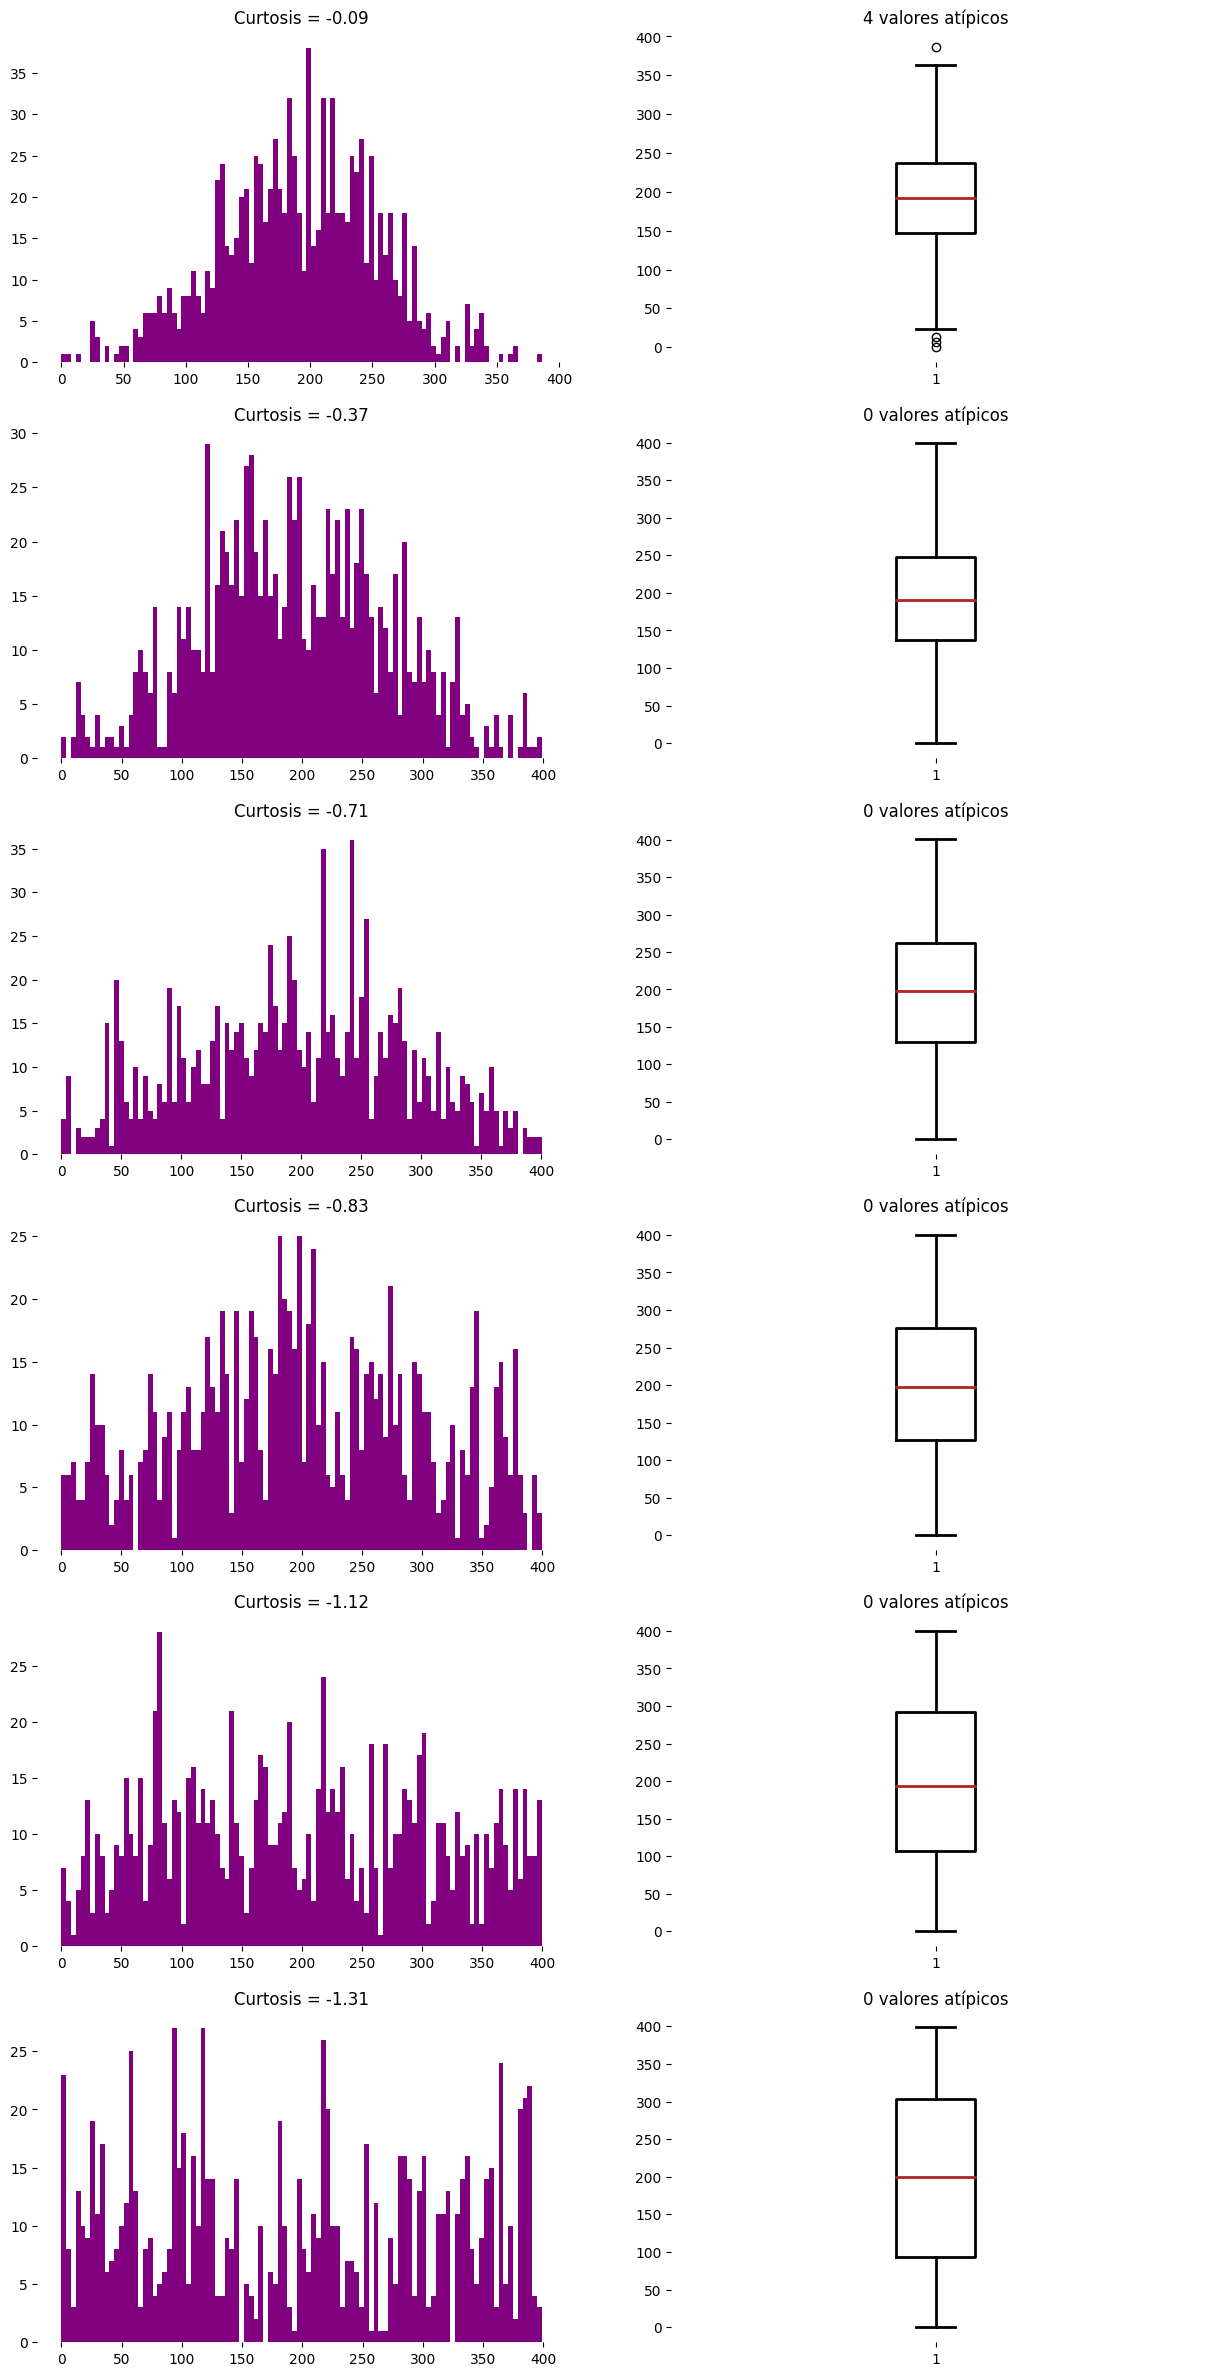

In [2]:
# creando subfiguras
figura, subfiguras = plt.subplots(6, 2)
figura.set_size_inches(15, 30)

# Semilla para propósitos de reproducibilidad
np.random.seed(seed=5)

# tamano de la muestra
tamano = 1000

# creando conjuntos de datos con diferentes niveles de curtosis negativas

for subfigura, corte in enumerate(np.arange(3, 0, -0.5)):
  # generando datos sintéticos a partir de una distribución normal
  datos = np.random.normal(loc=0, scale=1, size=tamano)

  # quitando datos de las colas a partir de un punto de corte para hacerlos menos extremos
  datos = datos[(-corte < datos) & (datos < corte)]

  # remuestreando datos para garantizar una muestra de tamano 1000
  datos = np.random.choice(datos, size=tamano)

  # escalando los datos entre un rango de 0 y 200 con fines de ilustración
  datos = ((datos - datos.min()) / datos.max()) * 200

  # contando los valores atípicos en función de la Regla de Tukey
  IQR = np.quantile(datos, 0.75) - np.quantile(datos, 0.25)
  minimo = np.quantile(datos, 0.25) - 1.5*IQR
  maximo = np.quantile(datos, 0.75) + 1.5*IQR
  num_atipicos = datos[datos > maximo].size + datos[datos < minimo].size

  # graficando histograma
  subfiguras[subfigura, 0].hist(datos, bins=100, color="purple")

  # calculando la curtosis
  subfiguras[subfigura, 0].set_title("Curtosis = %0.2f" % kurtosis(datos))

  # graficando diagrama de caja
  subfiguras[subfigura, 1].boxplot(datos,
                                   boxprops=dict(linewidth=2),
                                   medianprops = dict(linewidth=2, color="firebrick"),
                                   whiskerprops = dict(linewidth=2),
                                   capprops= dict(linewidth=2))
  subfiguras[subfigura, 1].set_title("%d valores atípicos" % num_atipicos)

  # quitando submarcos de las subfiguras
  for subfig in range(len(subfiguras[subfigura])):
    for llave, marco in subfiguras[subfigura, subfig].spines.items():
      marco.set_visible(False)

#plt.savefig("curtosis_negativa.png", bbox_inches="tight", transparent=True, dpi=600)
plt.show()

### Curtosis Positiva | Leptocurtica

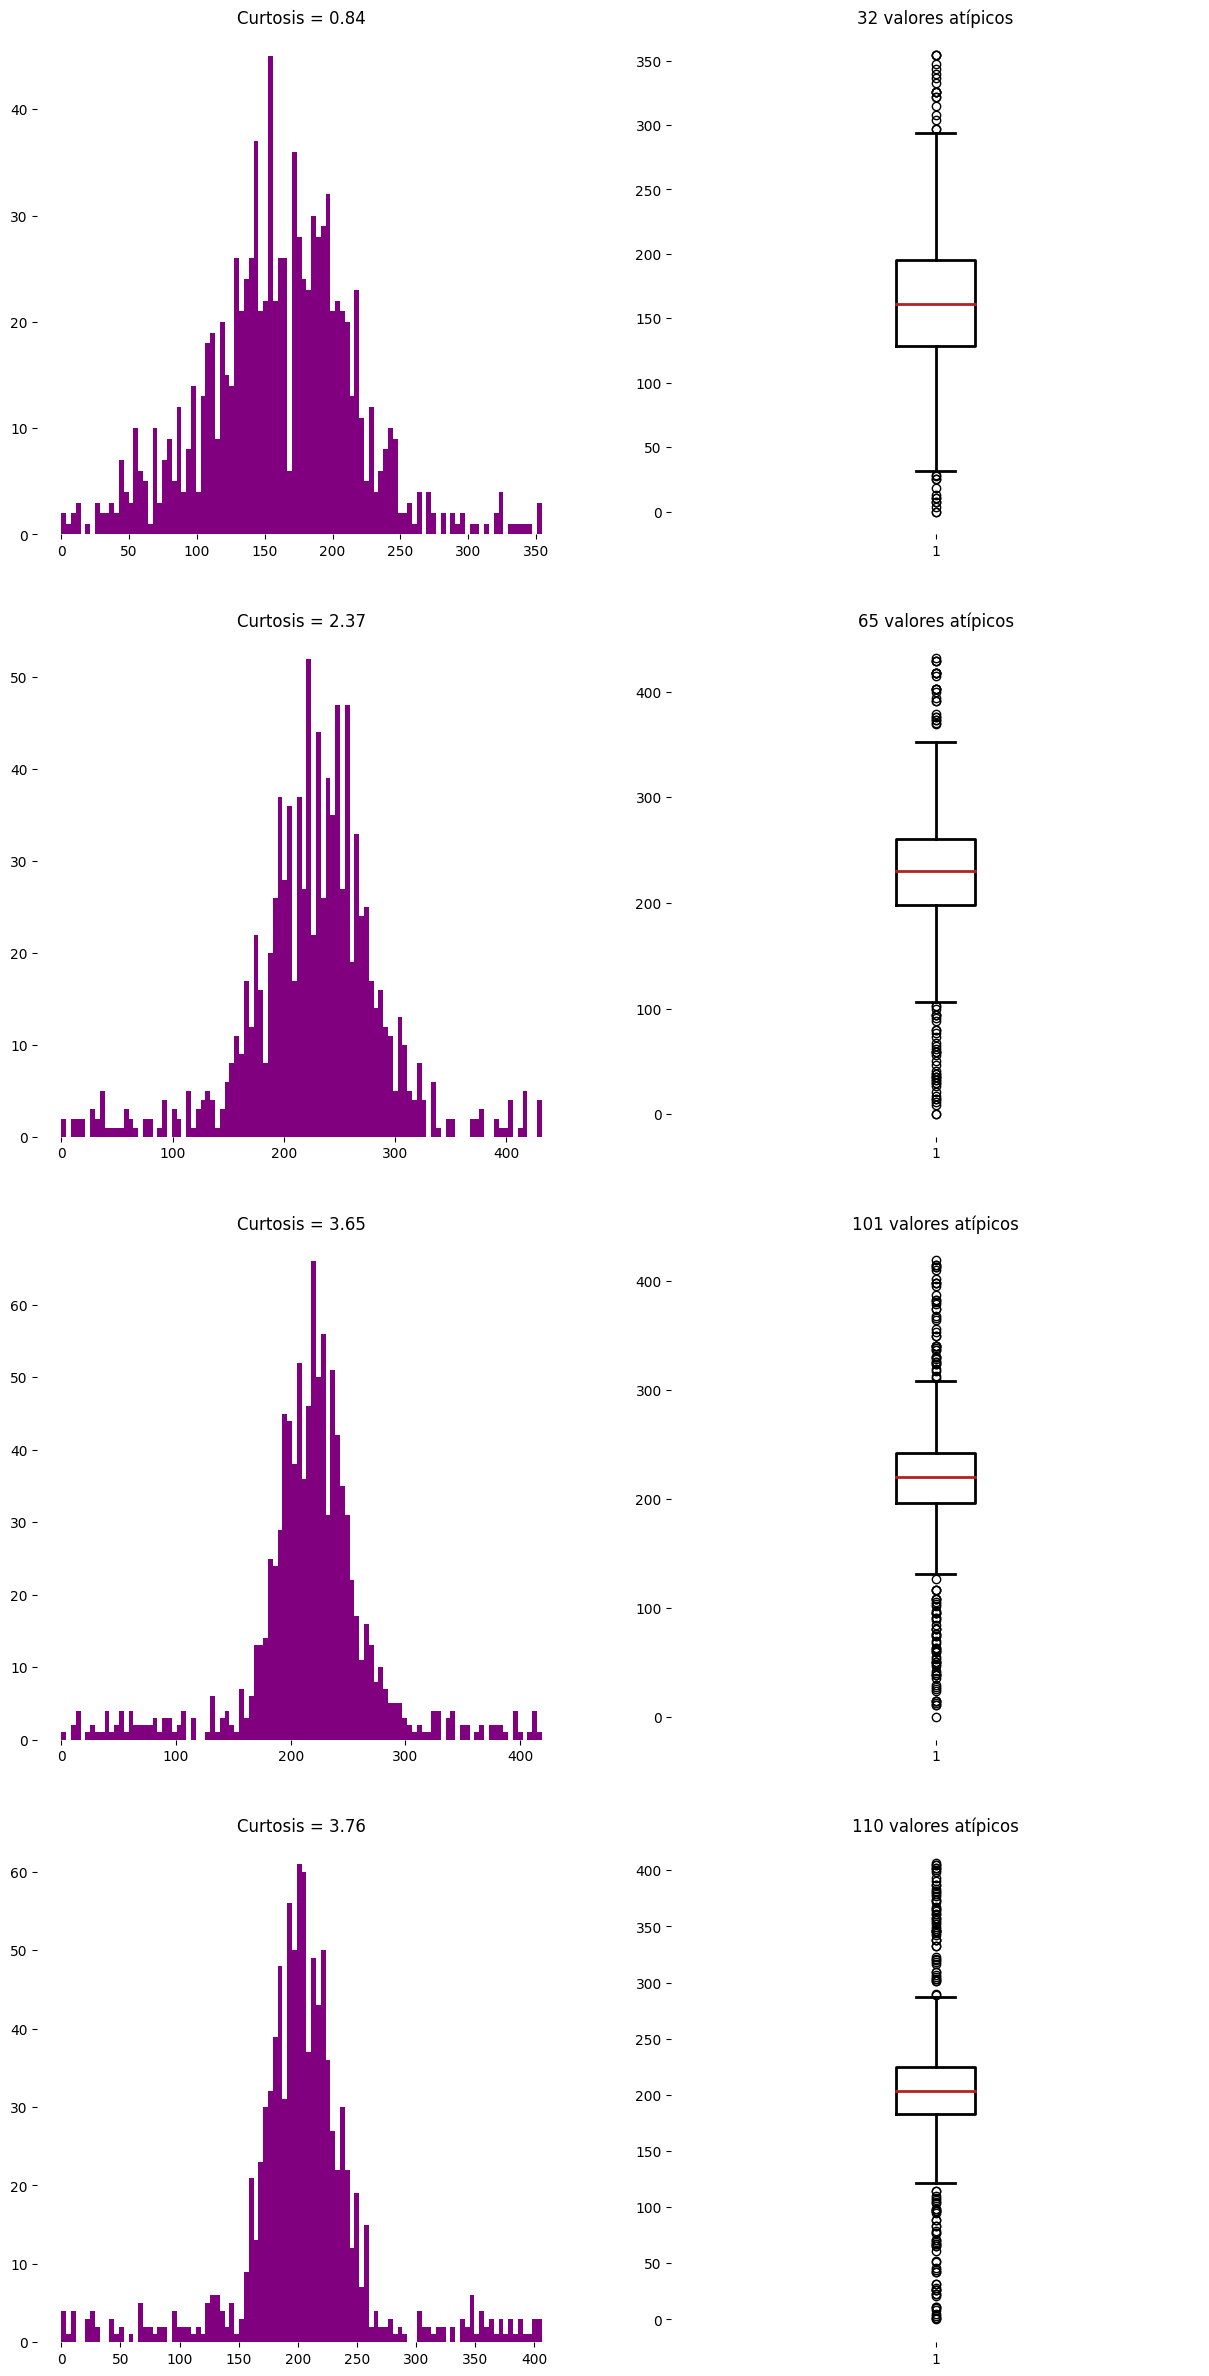

In [3]:
# Semilla para propósitos de reproducibilidad
np.random.seed(seed=1)

# creando subfiguras
figura, subfiguras = plt.subplots(4, 2)
figura.set_size_inches(15, 30)

# creando conjuntos de datos con diferentes niveles de curtosis positivas

for subfigura, rareza in enumerate(np.arange(1, 3, 0.5)):
  # generando datos sintéticos a partir de una distribución normal
  datos = np.random.normal(loc=0, scale=1, size=tamano)

  # identificando valores atípicos en función de la Regla de Tukey
  IQR = np.quantile(datos, 0.75) - np.quantile(datos, 0.25)
  minimo = np.quantile(datos, 0.25) - 1.5*IQR
  maximo = np.quantile(datos, 0.75) + 1.5*IQR
  atipicos = datos[(minimo > datos) | (datos > maximo)]

  # alejando aún más a los valores atípicos de la medida vía un factor de rareza
  atipicos = atipicos * rareza

  # creando valores intermedios entre los valores atípicos y los típicos
  atipicos = np.linspace(atipicos.min(), atipicos.max(), int(100*rareza))

  # uniendo los valores atípicos con los típicos
  datos = np.concatenate((datos, atipicos))

  # remuestreando datos para garantizar una muestra de tamano 1000
  datos = np.random.choice(datos, size=tamano)

  # escalando los datos entre un rango de 0 y 200 con fines de ilustración
  datos = ((datos - datos.min()) / datos.max()) * 200

  # contando los valores atípicos en función de la Regla de Tukey
  IQR = np.quantile(datos, 0.75) - np.quantile(datos, 0.25)
  minimo = np.quantile(datos, 0.25) - 1.5*IQR
  maximo = np.quantile(datos, 0.75) + 1.5*IQR
  num_atipicos = datos[datos > maximo].size + datos[datos < minimo].size

  # graficando diagrama de caja
  subfiguras[subfigura, 0].hist(datos, bins=100, color="purple")

  # calculando la curtosis
  subfiguras[subfigura, 0].set_title("Curtosis = %0.2f" % kurtosis(datos))

  # graficando diagrama de caja
  subfiguras[subfigura, 1].boxplot(datos,
                                   boxprops=dict(linewidth=2),
                                   medianprops = dict(linewidth=2, color="firebrick"),
                                   whiskerprops = dict(linewidth=2),
                                   capprops= dict(linewidth=2))
  subfiguras[subfigura, 1].set_title("%d valores atípicos" % num_atipicos)

  # quitando marcos de las subfiguras
  for subfig in range(len(subfiguras[subfigura])):
    for llave, marco in subfiguras[subfigura, subfig].spines.items():
      marco.set_visible(False)

#plt.savefig("curtosis_positiva.png", bbox_inches="tight", transparent=True, dpi=600)
plt.show()

#### Explicacion
1. Se genera un conjunto de datos a partir de una distribución normal.
2. Se identifican los valores atípicos usando la **Regla de Tukey**.
3. Estos valores atípicos se alejan aún más de la media mediante un **factor de rareza**, lo que incrementa su "extremidad".
4. Luego, se genera una serie de **valores intermedios** entre los valores atípicos y los típicos, lo que añade más datos fuera de la distribución normal.
5. Finalmente, los valores atípicos (modificados) se combinan con los datos originales, lo que resulta en una distribución con **colas más gruesas** y más


### Cortosis Normal

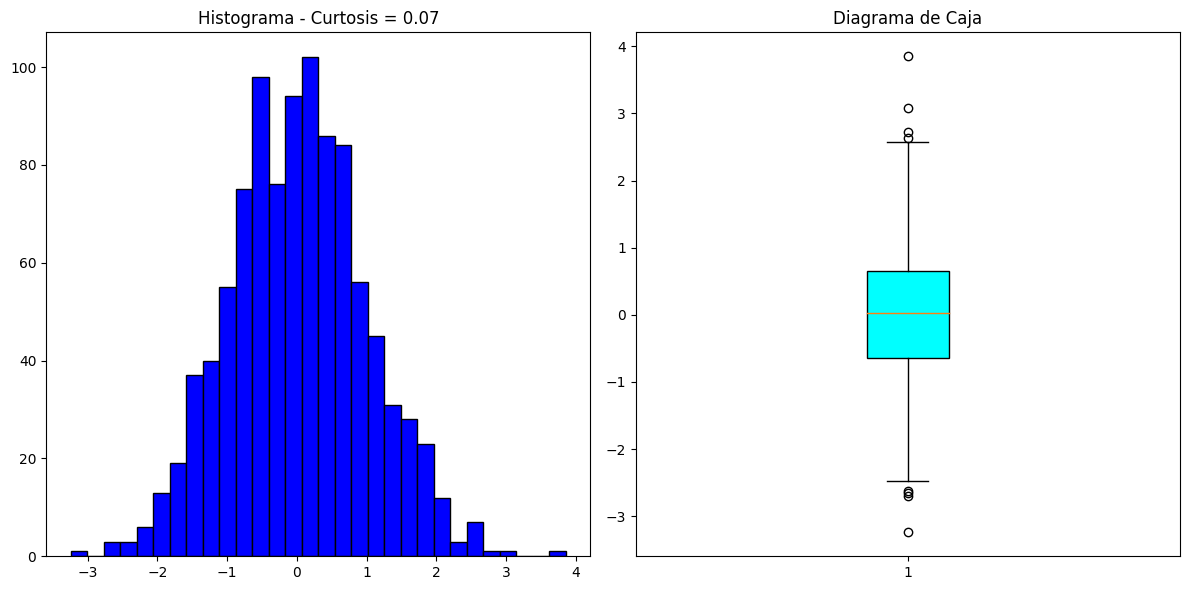

In [4]:
# Semilla para reproducibilidad
np.random.seed(42)

# Tamaño de la muestra
tamano = 1000

# Generando datos sintéticos a partir de una distribución normal
datos = np.random.normal(loc=0, scale=1, size=tamano)

# Calculando la curtosis (excesiva)
curtosis_valor = kurtosis(datos)

# Crear subfiguras para visualización
figura, subfiguras = plt.subplots(1, 2, figsize=(12, 6))

# Histograma
subfiguras[0].hist(datos, bins=30, color="blue", edgecolor="black")
subfiguras[0].set_title(f"Histograma - Curtosis = {curtosis_valor:.2f}")

# Diagrama de caja (Boxplot)
subfiguras[1].boxplot(datos, patch_artist=True, boxprops=dict(facecolor="cyan"))
subfiguras[1].set_title("Diagrama de Caja")

# Mostrar los gráficos
plt.tight_layout()
plt.show()
